<a href="https://colab.research.google.com/github/gunjanjoshi-0798/tedTalk-repository/blob/main/TedTalkRegression_by_Gunjan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - TED TALK VIEWS PREDICTION



##### **Project Type**    - Regression
##### **Name**    - Gunjan Joshi


# **Project Summary -**

1. Importing Libraries

2. Loading the Dataset

3. EDA on features

4. Feature Engineering

5. Data Cleaning

6. Feature selection

7. Fitting the regression models and HyperParameter Tuning

8. Comparison of Models

9. Final selection of the model

10. Conclusion

# **GitHub Link -**

https://github.com/gunjanjoshi-0798/tedTalk-repository/blob/main/TedTalkRegression_by_Gunjan.ipynb

# **Problem Statement**


TED is devoted to spreading powerful ideas on just about any topic. This dataset contain over 4,005 TED talks including transcripts in many languages.

Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

TED talks have been given for many years with the platform of "Ideas Worth Spreading". In the digital world we live in today, TED is a great platform to get your idea out there. But how do you know if your idea will be heard or appreciated.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

#for the graph aesthetics
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (10,5)
matplotlib.rcParams['figure.facecolor'] = 'FFEFDB'

In [ ]:
#importing datetime
from datetime import datetime
from datetime import timedelta
import calendar

today = datetime.now()
today.strftime('%Y-%m-%d')

'2024-01-11'

In [ ]:
!pip install scikit-optimize
!pip install catboost
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data_ted_talks.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society

In [ ]:
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [ ]:
df.tail()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Number of rows: {len(df.axes[0])}")
print(f"Number of columns: {len(df.axes[1])}")

Number of rows: 4005
Number of columns: 19


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
(df.duplicated()).value_counts()

False    4005
dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

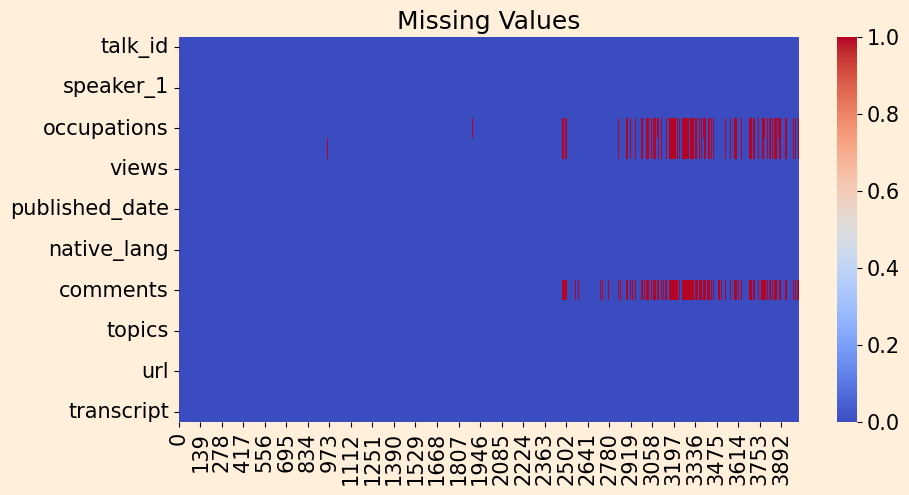

In [ ]:
# Visualizing the missing values
plt.figure(figsize= (10,5))
sns.heatmap(df.isna().transpose(), cmap = 'coolwarm')
plt.title('Missing Values')
plt.show()

### What did you know about your dataset?

The views column is the dependent variable rest of them are feature column. There are few values missing from the features: occupations, about_speakers and comments. Most of the feature variables are categorical.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
talk_id,4005.0,NaN,NaN,NaN,12432.538327,17447.576262,1.0,1252.0,2333.0,23777.0,62794.0
title,4005,4005,Averting the climate crisis,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speaker_1,4005,3274,Alex Gendler,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
all_speakers,4001,3306,{0: 'Alex Gendler'},34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupations,3483,2049,{0: ['writer']},53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
about_speakers,3502,2977,{0: 'Alex Rosenthal takes everyday experiences...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views,4005.0,NaN,NaN,NaN,2148005.573783,3451225.523659,0.0,882069.0,1375508.0,2133110.0,65051954.0
recorded_date,4004,1334,2017-04-24,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
published_date,4005,2962,2017-09-07,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event,4005,459,TED-Ed,556,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

***The dataset contains features like:***


*   talk_id: Talk identification number provided by TED

*    title: Title of the talk

*     speaker_1: First speaker in TED's speaker list

*    all_speakers: Speakers in the talk

*    occupations: Occupations of the speakers

*    about_speakers: Blurb about each speaker

*    recorded_date: Date the talk was recorded

*    published_date: Date the talk was published to TED.com

*    event: Event or medium in which the talk was given

*   native_lang: Language the talk was given in

*   available_lang: All available languages (lang_code) for a talk

*   comments: Count of comments

*   duration: Duration in seconds

*   topics: Related tags or topics for the talk

*   related_talks: Related talks (key='talk_id',value='title')

*   url: URL of the talk

*   description: Description of the talk

*   transcript: Full transcript of the talk

***And the target variable***

*  views : Count of views



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
pd.Series({col:df[col].nunique() for col in df})

talk_id           4005
title             4005
speaker_1         3274
all_speakers      3306
occupations       2049
about_speakers    2977
views             3996
recorded_date     1334
published_date    2962
event              459
native_lang         12
available_lang    3902
comments           601
duration          1188
topics            3977
related_talks     4005
url               4005
description       4005
transcript        4005
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
tedtalk_df=df.copy()

In [ ]:
#NaN values in 'comment' can be converted to 0
tedtalk_df['comments'].fillna(0, inplace = True)
#Dropping the only NaN in 'recorded_date'
tedtalk_df = tedtalk_df.dropna(subset= ['recorded_date'])
#Dropping the NaN values in all_speakers column
tedtalk_df['all_speakers'].fillna('N/A',inplace=True)
#Changing the NaN values of 'occupation' column to - Not available
tedtalk_df['occupations'].fillna('N/A',inplace=True)
#Changing the NaN values of 'about_speakers' column to - Not available
tedtalk_df['about_speakers'].fillna('N/A',inplace=True)
tedtalk_df['total_languages'] = tedtalk_df['available_lang'].apply(lambda x: len(x))

In [ ]:
tedtalk_df.isna().sum()

talk_id            0
title              0
speaker_1          0
all_speakers       0
occupations        0
about_speakers     0
views              0
recorded_date      0
published_date     0
event              0
native_lang        0
available_lang     0
comments           0
duration           0
topics             0
related_talks      0
url                0
description        0
transcript         0
total_languages    0
dtype: int64

In [ ]:
#checking for duplicated columns
tedtalk_df.duplicated().sum()

0

In [ ]:
tedtalk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'total_languages'],
      dtype='object')

In [ ]:
data_numerical= tedtalk_df[['views', 'duration','comments','talk_id']]

data_categorical= tedtalk_df[['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'native_lang', 'available_lang', 'topics', 'related_talks', 'url', 'description', 'transcript']]


In [ ]:
tedtalk_df['recorded_date'] = pd.to_datetime(tedtalk_df['recorded_date'], format = '%Y-%m-%d')
tedtalk_df['published_date'] = pd.to_datetime(tedtalk_df['published_date'], format = '%Y-%m-%d')

In [ ]:
# extracting date, month, year from published date and adding to dataset
from datetime import datetime
from datetime import timedelta
import calendar

#Extracting month from published_date column
tedtalk_df['published_month'] = pd.DatetimeIndex(tedtalk_df['published_date']).month
tedtalk_df['published_month'] = tedtalk_df['published_month'].apply(lambda x: calendar.month_abbr[x])

#Extracting day from published_date column
tedtalk_df['published_day'] = pd.DatetimeIndex(tedtalk_df['published_date']).day

#Extracting year from published_date column
tedtalk_df['published_year'] = pd.DatetimeIndex(tedtalk_df['published_date']).year

#Extracting week day from published_date
tedtalk_df['dayofweek'] = tedtalk_df['published_date'].dt.day_name()

#converting day of week to day [1-mon,2-tue,3-wed,4-thr,5-fri,6-sat,0-sun]
tedtalk_df['dayofweek_num']= tedtalk_df['published_date'].apply(lambda a: a.strftime("%w")).astype('int64')

#calculating video age with respect to day by adding one day to last data value
tedtalk_df['video_age_day'] = tedtalk_df['published_date'].max() + timedelta(days=1)-(pd.DatetimeIndex(tedtalk_df['published_date']))
tedtalk_df['video_age_day'] = tedtalk_df['video_age_day'].dt.days
tedtalk_df.tail(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,url,description,transcript,total_languages,published_month,published_day,published_year,dayofweek,dayofweek_num,video_age_day
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,...,https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...,6,Apr,28,2020,Tuesday,2,3
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},N/A,N/A,56582,2020-04-28,2020-04-30,TED-Ed,...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ...",6,Apr,30,2020,Thursday,4,1
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},N/A,N/A,0,2020-04-30,2020-04-30,TED-Ed,...,https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...,6,Apr,30,2020,Thursday,4,1


In [ ]:
#Creating a daily average views section
tedtalk_df['avg_daily_views'] = tedtalk_df['views'] / tedtalk_df['video_age_day']
tedtalk_df.sample(8)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,description,transcript,total_languages,published_month,published_day,published_year,dayofweek,dayofweek_num,video_age_day,avg_daily_views
2599,5498,A bold plan to house 100 million people,Gautam Bhan,{0: 'Gautam Bhan'},{0: ['urbanist']},{0: 'Gautam Bhan studies how cities produce an...,539603,2017-12-10,2017-12-11,TED Talks India,...,"Mumbai, Delhi, Chennai, Kolkata -- all the maj...","Shah Rukh Khan: Be it Mumbai or Delhi, Chennai...",93,Dec,11,2017,Monday,1,872,618.810780
3314,24044,The case of the vanishing honeybees,Emma Bryce,{0: 'Emma Bryce'},N/A,N/A,517333,2014-03-18,2019-03-15,TED-Ed,...,"In the past decade, the US honeybee population...","There is an environmental mystery afoot, and i...",159,Mar,15,2019,Friday,5,413,1252.622276
494,622,"One seed at a time, protecting the future of food",Cary Fowler,{0: 'Cary Fowler'},{0: ['biodiversity archivist']},{0: 'Biodiversity warrior Cary Fowler wants to...,838866,2009-07-23,2009-08-31,TEDGlobal 2009,...,"The wheat, corn and rice we grow today may not...",I've been fascinated with crop diversity for a...,171,Aug,31,2009,Monday,1,3896,215.314682
678,887,Let's raise kids to be entrepreneurs,Cameron Herold,{0: 'Cameron Herold'},{0: ['entrepreneur']},"{0: 'An entrepreneur since childhood, Cameron ...",1838195,2010-03-13,2010-06-17,TEDxEdmonton,...,"Bored in school, failing classes, at odds with...",I would be willing to bet I'm the dumbest guy ...,213,Jun,17,2010,Thursday,4,3606,509.760122
3673,49989,Revelations from a lifetime of dance,Judith Jamison,"{0: 'Judith Jamison', 1: 'Alvin Ailey American...","{0: ['dancer', 'choreographer'], 1: ['dance co...",{0: 'Judith Jamison uses dance as a medium for...,218475,2019-04-15,2019-10-11,TED2019,...,"""Dance can elevate our human experience beyond...","(Music: ""Wade in the Water"" by Ella Jenkins) W...",81,Oct,11,2019,Friday,5,203,1076.231527
1592,1892,A new vision for rebuilding Detroit,Toni Griffin,{0: 'Toni Griffin'},{0: ['place maker']},{0: 'Toni Griffin is an urban planner working ...,885435,2013-10-11,2013-12-16,TEDCity2.0,...,Once the powerhouse of America's industrial mi...,"By 2010, Detroit had become the poster child f...",153,Dec,16,2013,Monday,1,2328,380.341495
2034,2371,Why sneakers are a great investment,Josh Luber,{0: 'Josh Luber'},{0: ['sneaker data expert']},"{0: 'Josh Luber is the founder of Campless, a ...",2176492,2015-10-15,2015-11-16,TED@IBM,...,"Josh Luber is a ""sneakerhead,"" a collector of ...",This is the Air Jordan 3 Black Cement. This mi...,135,Nov,16,2015,Monday,1,1628,1336.911548
125,153,How I built a windmill,William Kamkwamba,{0: 'William Kamkwamba'},{0: ['inventor']},"{0: 'To power his family\'s home, young Willia...",3029410,2007-06-05,2007-07-31,TEDGlobal 2007,...,"When he was just 14 years old, Malawian invent...","Chris Anderson: William, hi. Good to see you. ...",282,Jul,31,2007,Tuesday,2,4658,650.367110


### What all manipulations have you done and insights you found?

1. First I started by categorizing Variable types:

data_categorical = data[['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'native_lang', 'available_lang','topics', 'related_talks', 'url', 'description', 'transcript' ]]

data_numerical= data[[ 'talk_id' , 'views' , 'duration' , 'comments' ]]

data_target_variable(Y) = data[['views']]

2. Then I changed the dates from object to Datetime format.
3. Then I created a daily average views feature

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Numerical features of Ted talk dataset

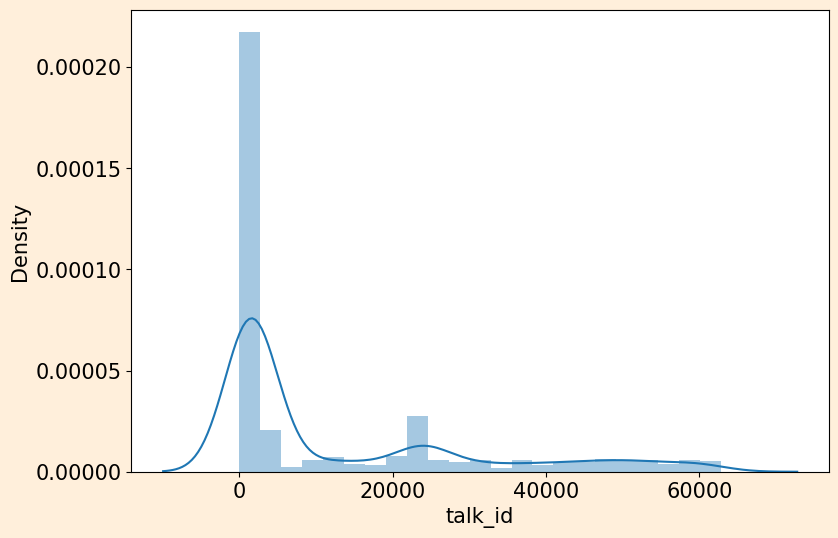

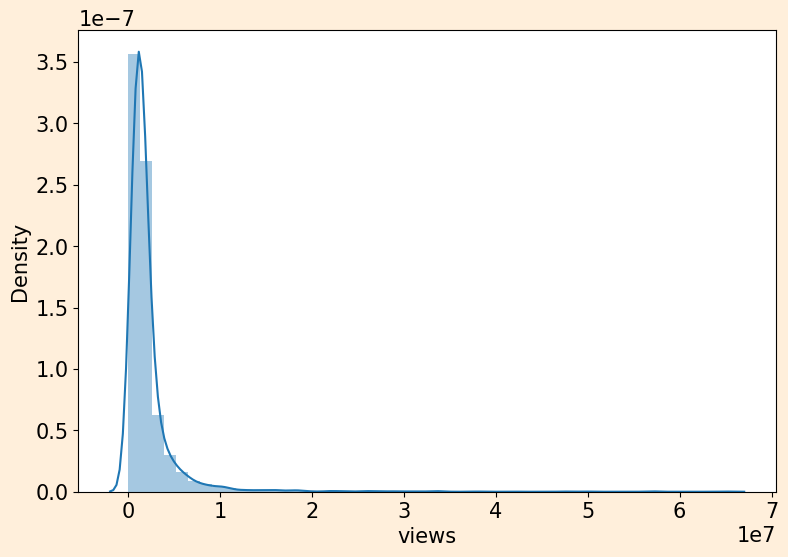

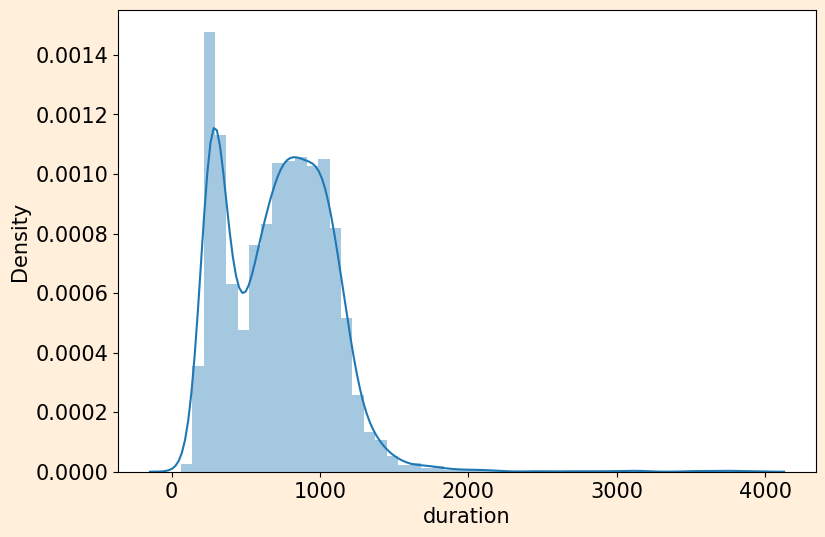

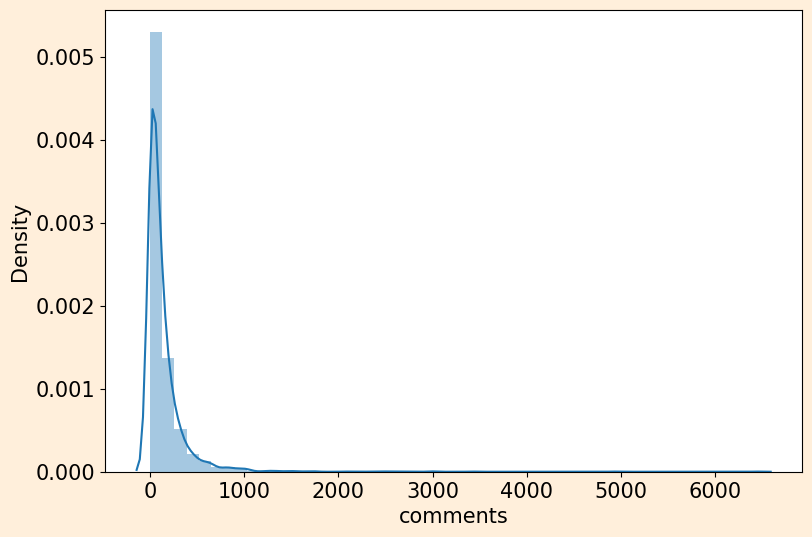

In [ ]:
# Chart - 1 visualization code
data_numerical= tedtalk_df[[ 'talk_id' , 'views' , 'duration' , 'comments' ]]
for col in data_numerical[1:]:
    plt.figure(figsize=(9, 6))
    sns.distplot(tedtalk_df[col])

#### Chart - 2 Speaker with the highest views

In [ ]:
# Chart - 2 visualization code
# Extarcting the records of top 10 most viewed Speaker
df_2 = tedtalk_df.groupby('speaker_1').agg({'views':'sum'})
df_2 = df_2.sort_values(['views'],ascending = False).reset_index().head(10)
df_2

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


Text(0.5, 1.0, 'Count')

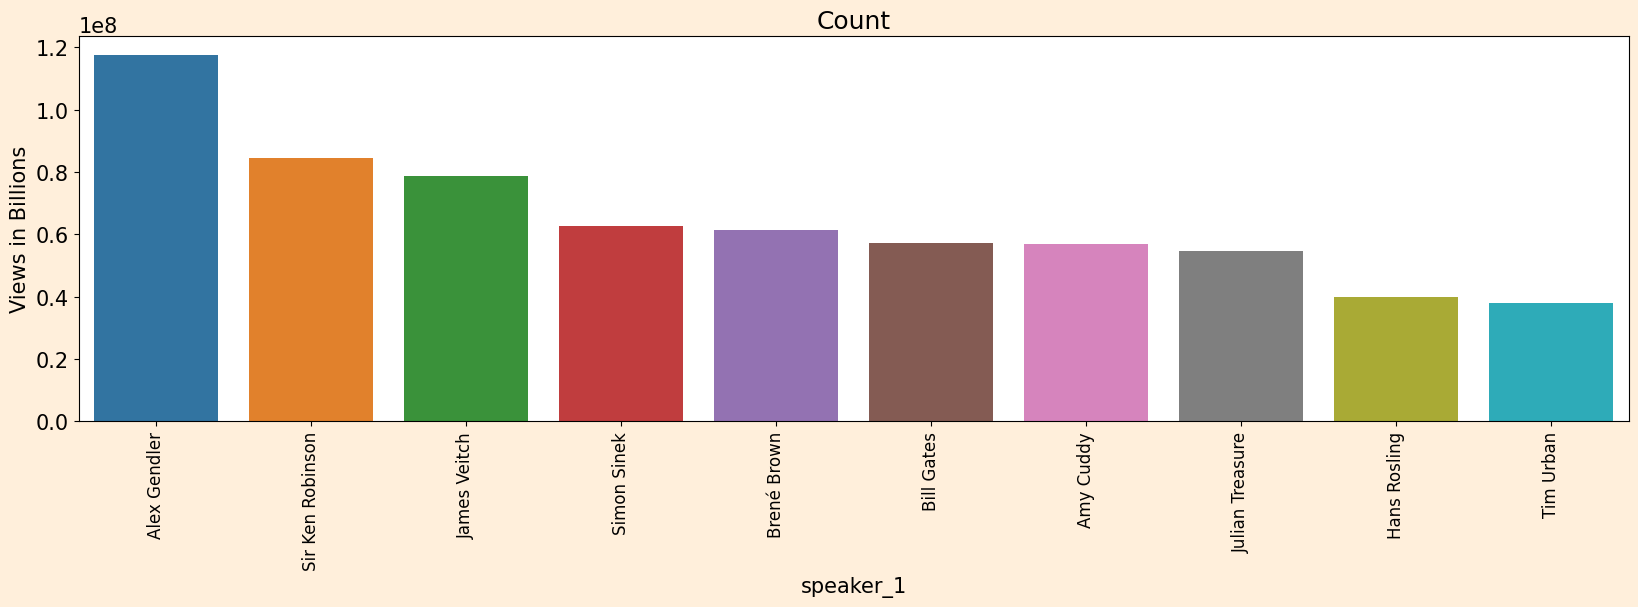

In [ ]:
# Barplot of speaker vs Views
plt.subplots(figsize=(20,5))
sns.barplot(data= df_2, x='speaker_1',y= 'views')
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('Views in Billions',fontsize = 15)
plt.title('Count',fontsize = 18)

In [ ]:
# Rating the average views of the speaker_1 column
pop_speaker=tedtalk_df.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_speaker=pop_speaker.to_dict()
pop_speaker=pop_speaker.values()
pop_speaker=  list(pop_speaker)[0]
tedtalk_df['speaker_1_avg_views']=tedtalk_df['speaker_1'].map(pop_speaker)

Alex Gendler has most no. of views i.e. 117619583 followed by Sir Ken Robinson. 84380518

#### Chart - 3 Most viewed title and speaker

In [ ]:
# Chart - 3 visualization code
# Let's findout the most viewed title and speaker
df_1 = tedtalk_df.sort_values(['views'],ascending=False).head()
df_1[['title','speaker_1', 'views' ]]

,title,speaker_1,views
4,Do schools kill creativity?,Sir Ken Robinson,65051954
1296,Your body language may shape who you are,Amy Cuddy,57074270
2062,This is what happens when you reply to spam email,James Veitch,56932551
646,How great leaders inspire action,Simon Sinek,49730580
796,The power of vulnerability,Brené Brown,47544833


Text(0.5, 1.0, 'Count')

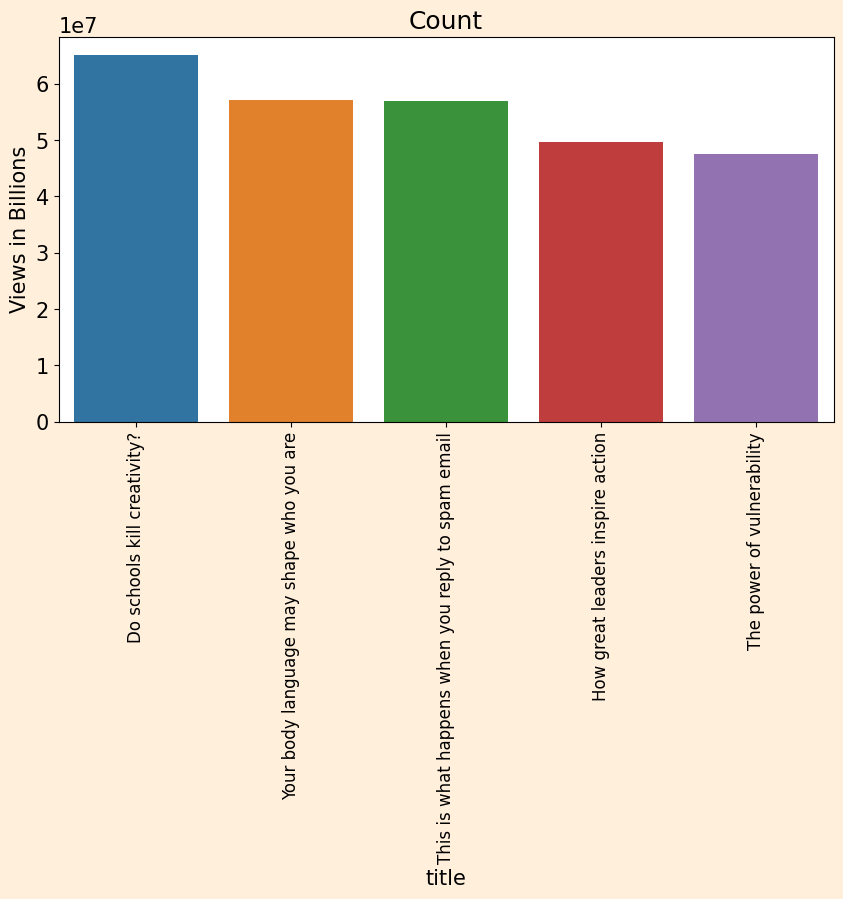

In [ ]:
sns.barplot(data= df_1, x='title',y= 'views')
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('Views in Billions',fontsize = 15)
plt.title('Count',fontsize = 18)

Sir Ken Robinson's talk on "Do Schools Kill Creativity?" is the most popular TED Talk of all time with more than 65 million views.

It is closely followed by Amy Cuddy talk on "Your body language may shape who you are" with more than 57 million views.

There is only one talk that has crossed 60 million mark while 3 talks have crossed 50 million mark.

#### Chart - 4 Most popular event in TED talks

In [ ]:
# Chart - 4 visualization code
# Comparing Event with respect to views
df_3 = tedtalk_df.groupby('event').agg({'views':'sum'})
df_3 = df_3.sort_values(['views'],ascending = False).reset_index().head(10)
df_3

,event,views
0,TED-Ed,1145357780
1,TED2015,247702961
2,TED2014,240295871
3,TEDGlobal 2013,235410234
4,TED2017,227847725
5,TED2016,227358612
6,TED2013,225967516
7,TED2012,197746106
8,TED2018,196346377
9,TED2009,191190144


Text(0.5, 1.0, 'Event')

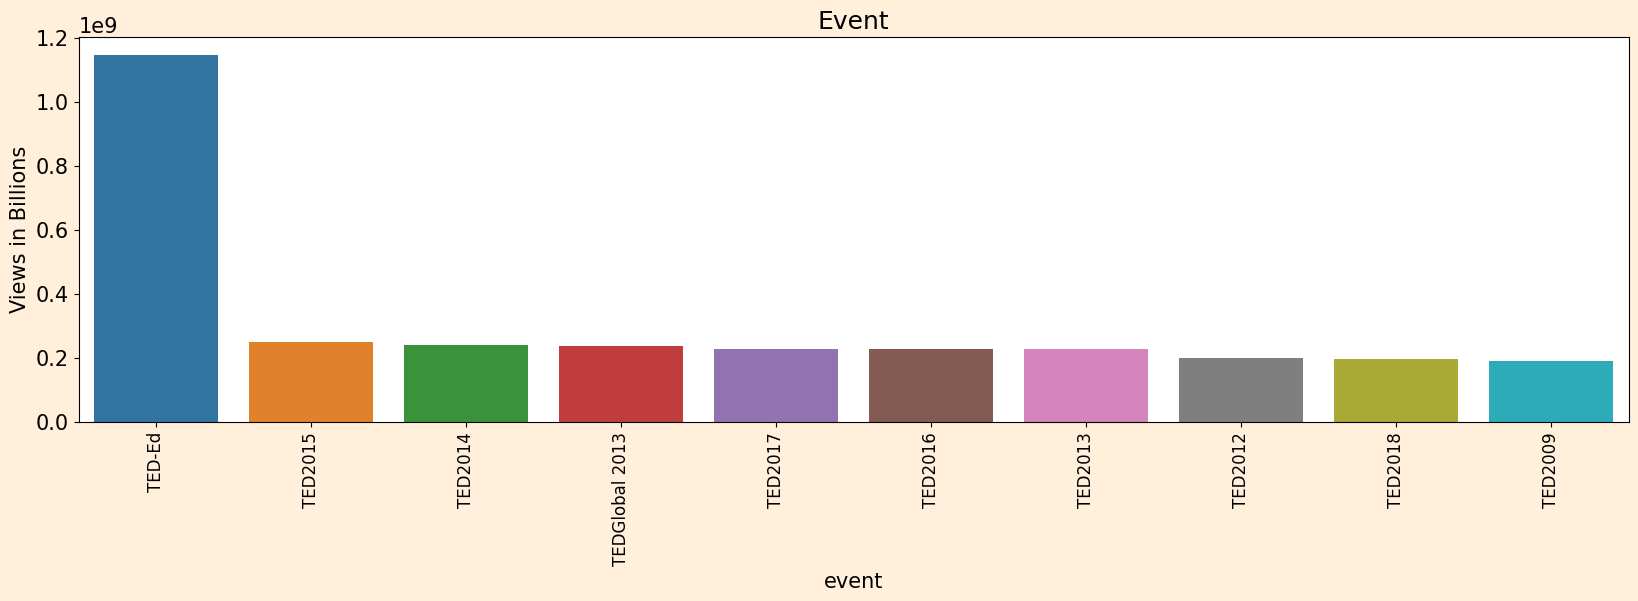

In [ ]:
# Box plot between TED talk Event and Views
plt.subplots(figsize=(20,5))
sns.barplot(data= df_3, x='event',y= 'views')
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('Views in Billions',fontsize = 15)
plt.title('Event',fontsize = 18)

From above its clear that TED-Ed is the most Popular event of TED talk followed by TED2015 and TED2014.

#### Chart - 5 Top 10 most Frequent Speaker's occupations

Text(0.5, 1.0, 'Count')

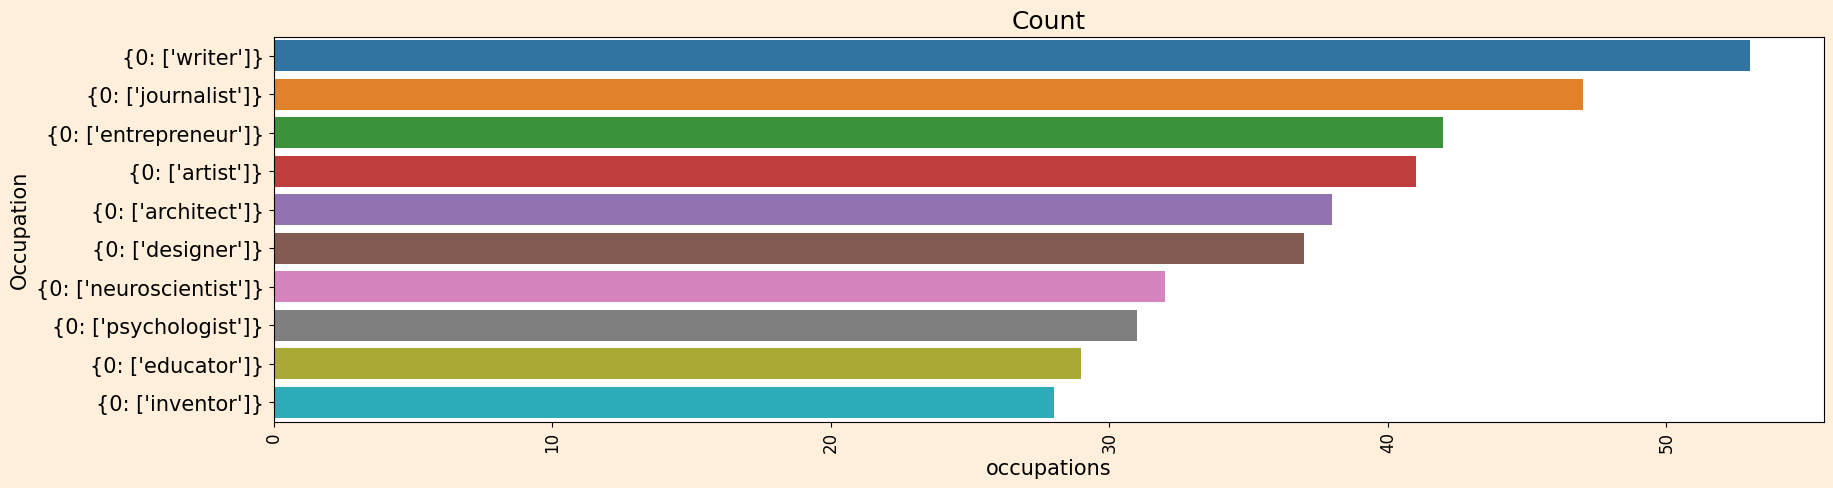

In [ ]:
# Chart - 5 visualization code
plt.rcParams["figure.figsize"] = (15,4)
occ_df = tedtalk_df['occupations'].value_counts()[1:].head(10).reset_index()
# Barplot of occupations with count
plt.subplots(figsize=(20,5))
sns.barplot(x = occ_df['occupations'], y = occ_df['index'])
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('Occupation',fontsize = 15)
plt.title('Count',fontsize = 18)

The majority of the speakers work as writers, followed by journalists and entrepreneurs.

#### Chart - 6 The frequency with which videos are uploaded throughout the year

Text(0.5, 1.0, 'Videos released by year')

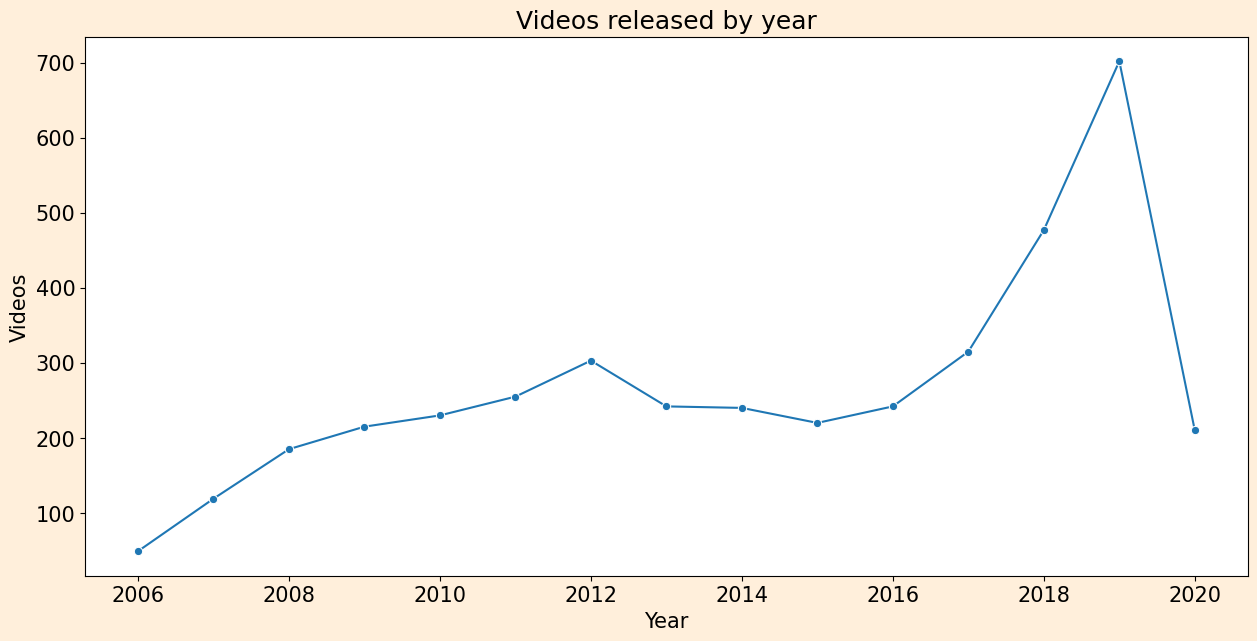

In [ ]:
# Chart - 6 visualization code
# Plot between videos and videos released year
plt.figure(figsize=(15,7))
sns.lineplot(data=tedtalk_df['published_year'].value_counts(),marker = 'o');
plt.xlabel('Year');
plt.ylabel('Videos');
plt.title('Videos released by year')

The quantity of videos were gradually increasing every year but dropped drastically in 2020 due to pandemic. The majority of videos were uploaded between 2018 and 2019.

#### Chart - 7 During which days most videos are released

Text(0.5, 1.0, 'Day of The Week vs No.of Videos Uploaded')

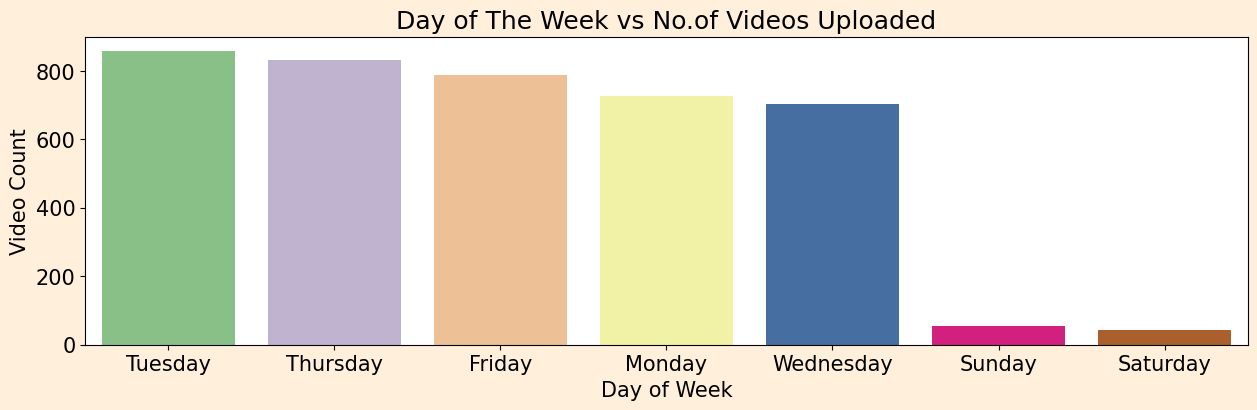

In [ ]:
# Chart - 7 visualization code
#Plot between week days with video count
sns.countplot(data = tedtalk_df ,x='dayofweek',palette ='Accent',order = tedtalk_df['dayofweek'].value_counts().index)
plt.xlabel('Day of Week',fontsize = 15)
plt.ylabel('Video Count',fontsize = 15)
plt.title('Day of The Week vs No.of Videos Uploaded',fontsize = 18)

We can clearly see that most of the TED talks are released in non-weekend days.

Most of the TED talks are released on Tuesday and Thursday followed by Friday.

#### Chart - 8 During which days videos are watched most

Text(0.5, 1.0, 'Day of The Week vs Views in Billions')

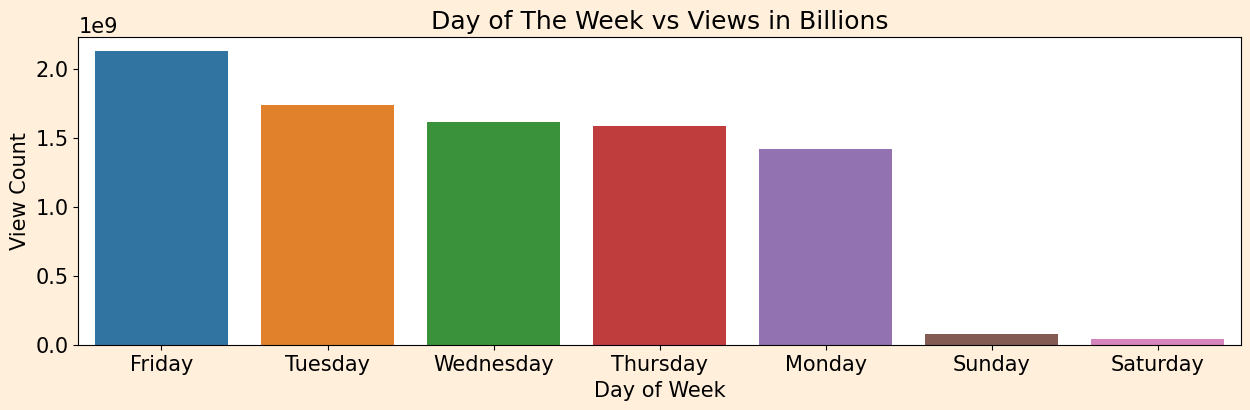

In [ ]:
# Chart - 8 visualization code
total_views = tedtalk_df.groupby('dayofweek')['views'].sum().reset_index().sort_values('views',ascending= False)
sns.barplot(x='dayofweek',y='views' ,data =total_views,order= total_views['dayofweek'].value_counts().index)
plt.xlabel('Day of Week',fontsize = 15)
plt.ylabel('View Count',fontsize = 15)
plt.title('Day of The Week vs Views in Billions',fontsize = 18)

Most people watch TED talks on non-weekend days this is because of the reason that most of the TED talks are released in non-weekend days.

Friday and Tuesday have the most views, followed by Wednesday.

#### Chart - 9 During which month most videos are released

Text(0.5, 1.0, 'Month vs No. of videos')

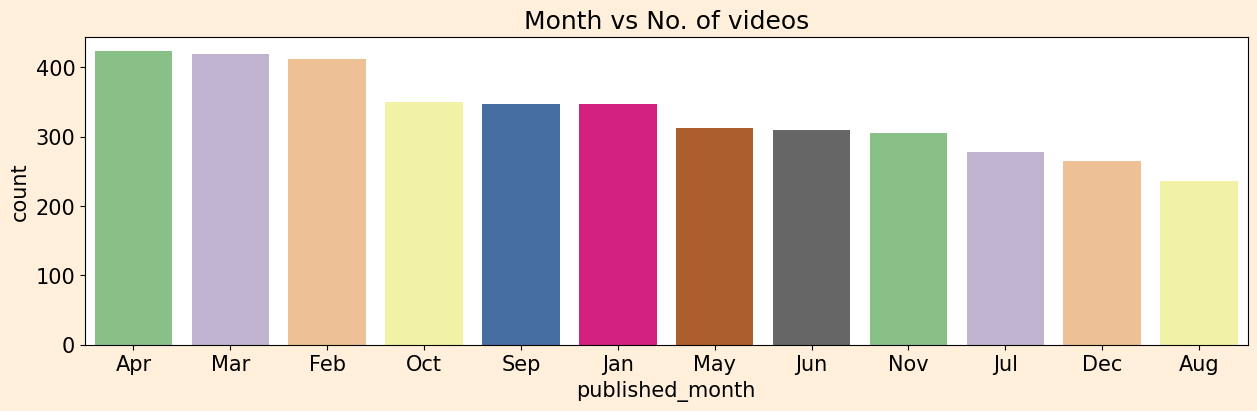

In [ ]:
# Chart - 9 visualization code
#Plot between month with respect to No. of videos
sns.countplot(data = tedtalk_df , x= 'published_month', palette ='Accent',order = tedtalk_df['published_month'].value_counts().index)
plt.title('Month vs No. of videos',fontsize = 18)

On an average the number of talks released in the month of April, March followed by February are higher. The number of talks released in August and December are comparatively lower than other months.

#### Chart - 10 During which month videos are watched most

Text(0.5, 1.0, 'Month vs Views ')

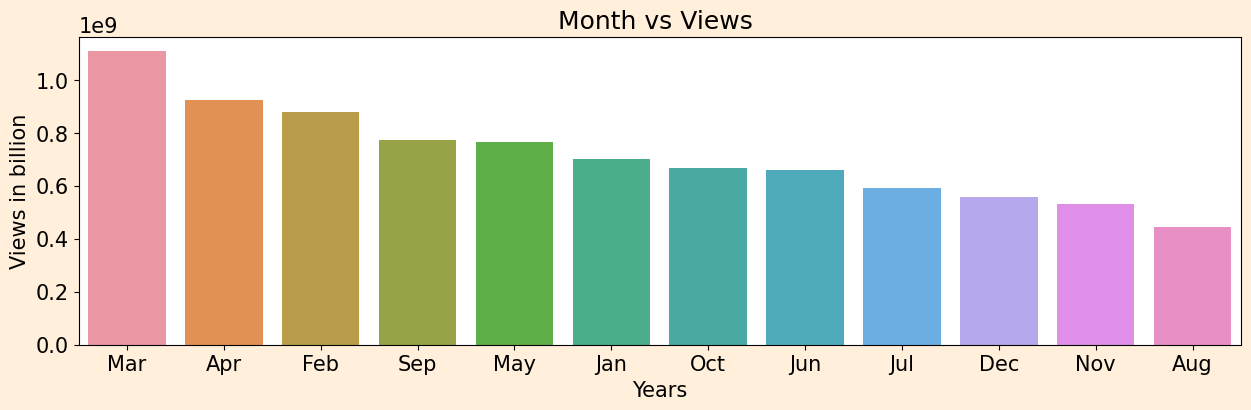

In [ ]:
# Chart - 10 visualization code
m_views = tedtalk_df.groupby('published_month')['views'].sum().reset_index().sort_values('views',ascending= False)
sns.barplot(x = 'published_month', y ='views', data= m_views,order= m_views['published_month'].value_counts().index)
plt.xlabel('Years',fontsize = 15)
plt.ylabel('Views in billion',fontsize = 15)
plt.title('Month vs Views ',fontsize = 18)

We can see that August, November and December months seems to have less views, While March and April months have most number of views.

#### Chart - 11 During which year most videos are released and what are it's view count

Text(0.5, 1.0, 'Year vs No. of videos')

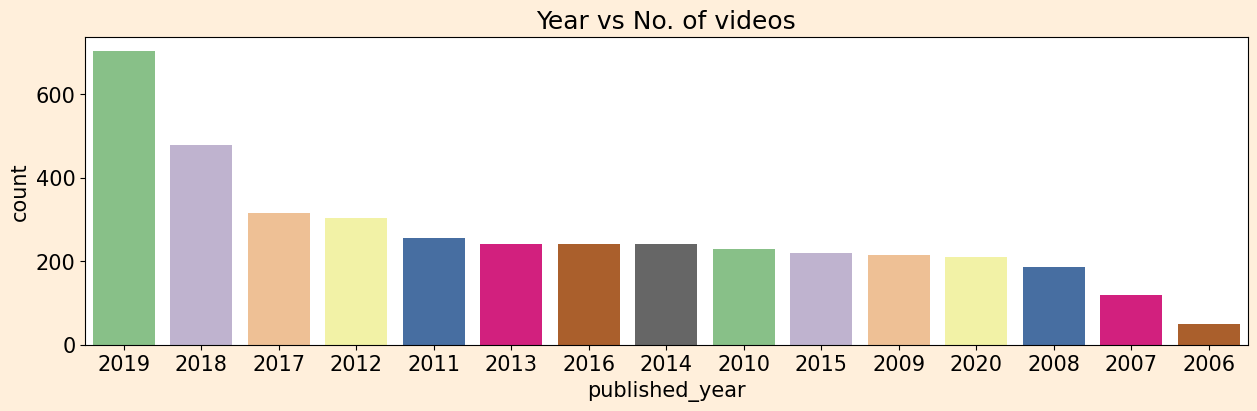

In [ ]:
# Chart - 11 visualization code
sns.countplot(data = tedtalk_df , x= 'published_year', palette ='Accent',order = tedtalk_df['published_year'].value_counts().index)
plt.title('Year vs No. of videos',fontsize = 18)

Text(0.5, 1.0, 'Year vs Views ')

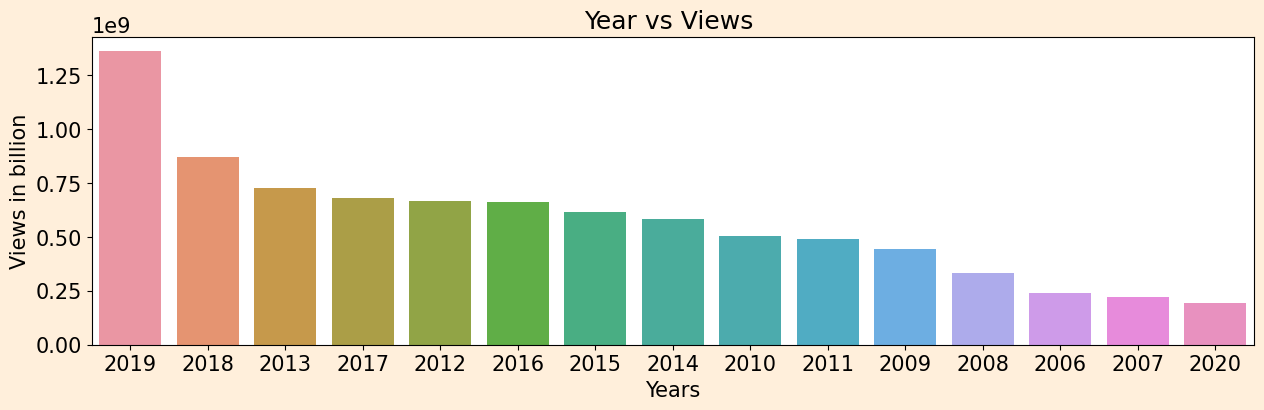

In [ ]:
#Plot between Published year with the views
y_views = tedtalk_df.groupby('published_year')['views'].sum().reset_index().sort_values('views',ascending= False)
sns.barplot(x = 'published_year', y ='views', data= y_views, order= y_views['published_year'].value_counts().index)
plt.xlabel('Years',fontsize = 15)
plt.ylabel('Views in billion',fontsize = 15)
plt.title('Year vs Views ',fontsize = 18)

According to the first bar graph more TED talks were published in 2019 and 2018 followed by in 2012 The second bar graph shows that there were more views in 2019 and 2018, and less views in 2006, 2007 and 2020.

#### Chart - 12 - Correlation Heatmap

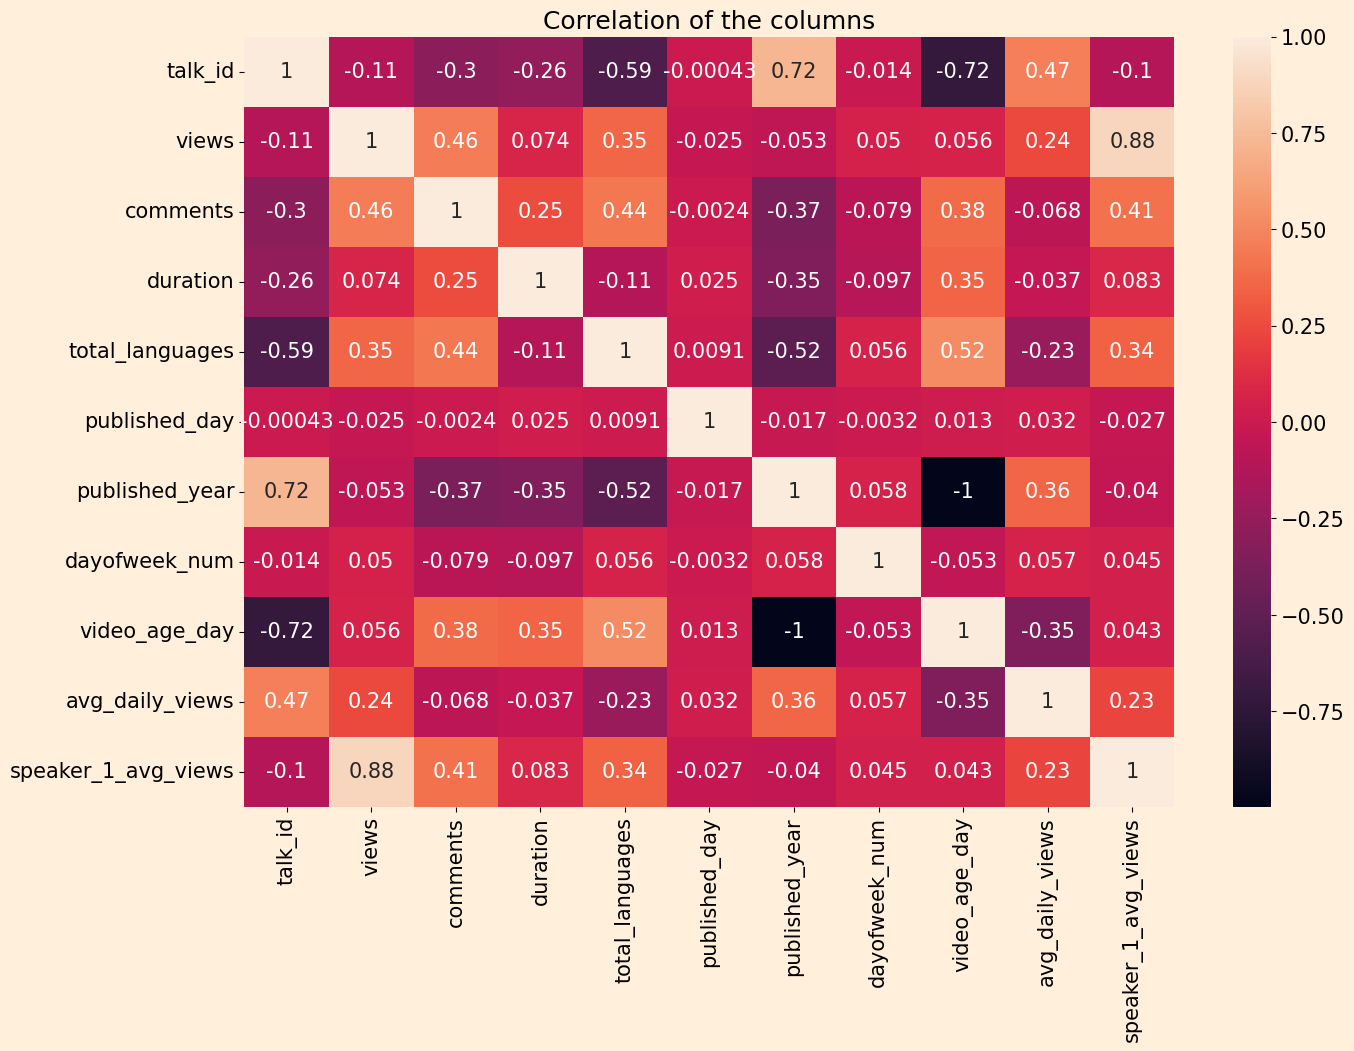

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(tedtalk_df.corr(numeric_only=True),annot=True)
plt.title('Correlation of the columns')
plt.show()

#### Chart - 13 - Pair Plot

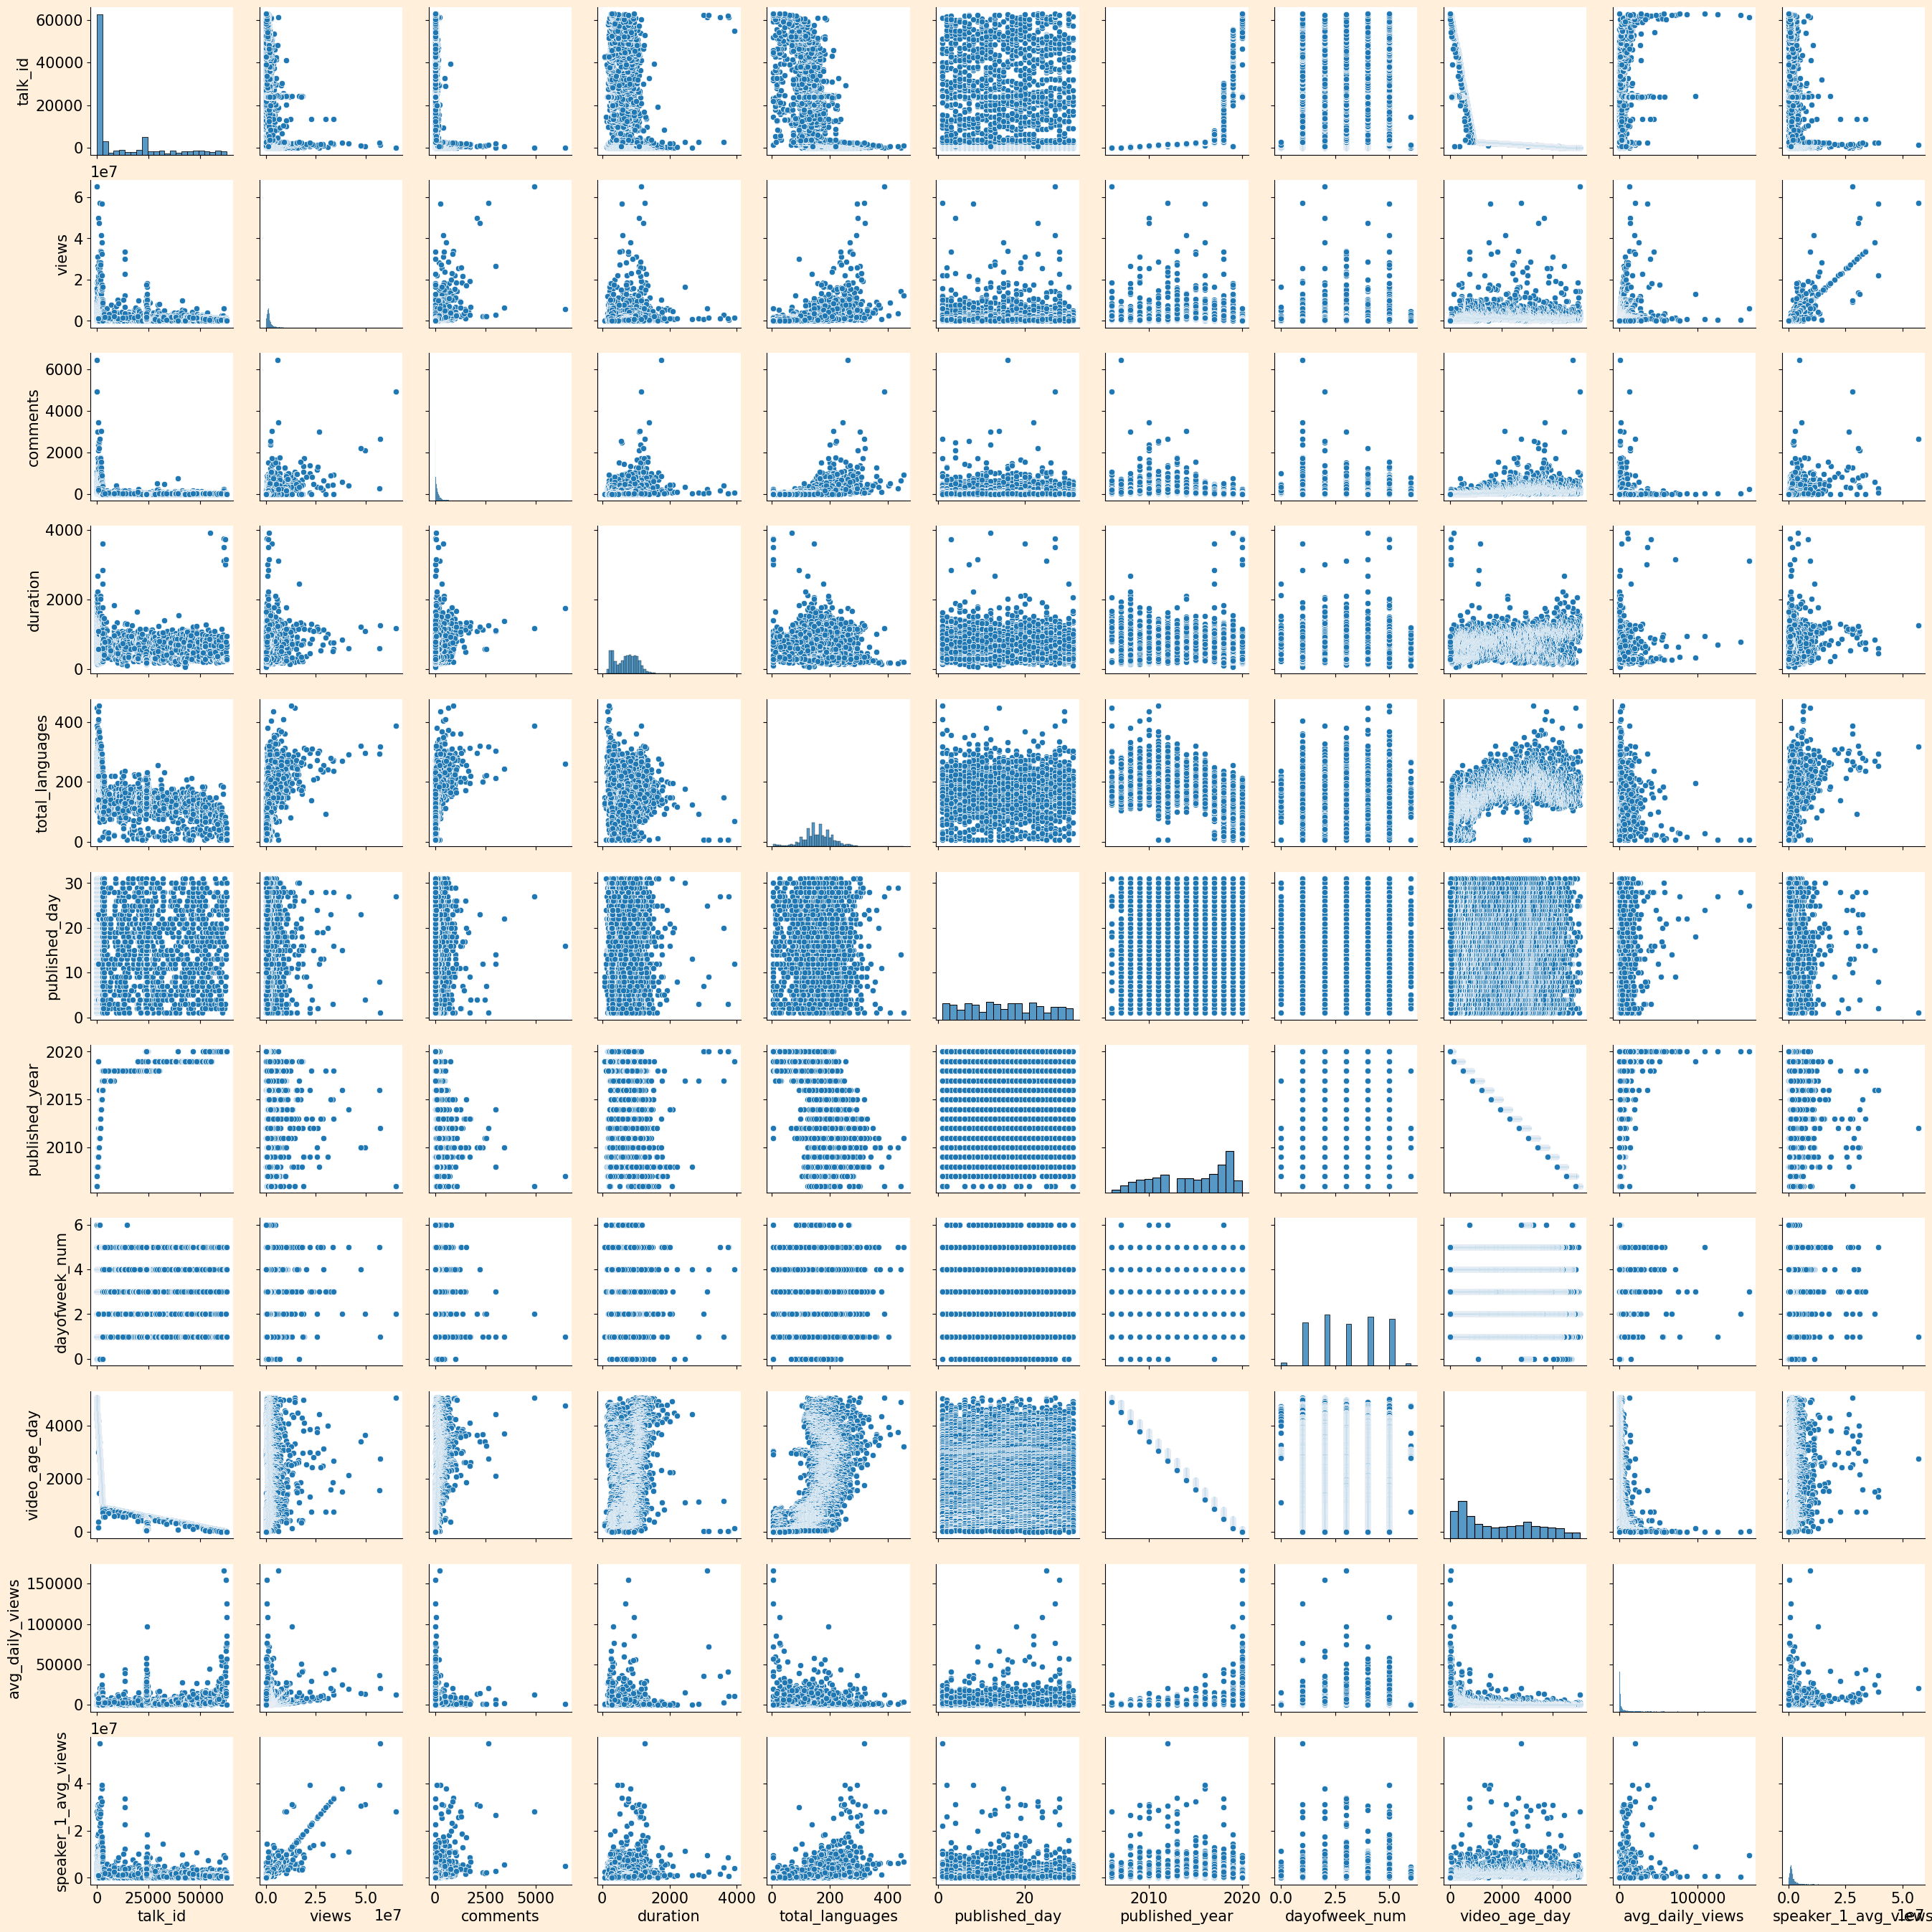

In [ ]:
# Pair Plot visualization code
sns.pairplot(tedtalk_df)
plt.show()

###  **FEATURE SELECTION:**

In [ ]:
# List of Column names
tedtalk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'total_languages',
       'published_month', 'published_day', 'published_year', 'dayofweek',
       'dayofweek_num', 'video_age_day', 'avg_daily_views',
       'speaker_1_avg_views'],
      dtype='object')

In [ ]:
#removing unwanted columns
tedtalk_df.drop( columns = ['talk_id', 'title', 'speaker_1', 'recorded_date', 'published_date','about_speakers', 'total_languages', 'event', 'url','description','transcript','native_lang','related_talks', 'available_lang', 'topics', 'all_speakers', 'occupations'], inplace = True)

In [ ]:
# List of columns after dropping unwanted columns
tedtalk_df.columns

Index(['views', 'comments', 'duration', 'published_month', 'published_day',
       'published_year', 'dayofweek', 'dayofweek_num', 'video_age_day',
       'avg_daily_views', 'speaker_1_avg_views'],
      dtype='object')

In [ ]:
#There is not much collinearity between the features, Let's try to treat outliers:
Q1 = tedtalk_df.quantile(0.25)
Q3 = tedtalk_df.quantile(0.75)
IQR = Q3 - Q1

((tedtalk_df < (Q1 - 1.5 * IQR)) | (tedtalk_df > (Q3 + 1.5 * IQR))).sum()

avg_daily_views        494
comments               297
dayofweek                0
dayofweek_num            0
duration                21
published_day            0
published_month          0
published_year           0
speaker_1_avg_views    373
video_age_day            0
views                  393
dtype: int64

It's clear that the columns : 'comments', 'duration', 'dayofweek_num', 'video_age_day', 'avg_daily_views', 'speaker_1_avg_views','views' have outliers let's treat it further.

In [ ]:
# Replacing outliers with IQR values
for i in ['comments', 'duration', 'dayofweek_num', 'video_age_day',
       'avg_daily_views', 'speaker_1_avg_views','views']:
  Q1 = tedtalk_df[i].quantile(0.25)
  Q3 = tedtalk_df[i].quantile(0.75)
  IQR = Q3 - Q1
# condition to change outliers to lower limit and upper limit value
  tedtalk_df[i]=np.where(tedtalk_df[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(tedtalk_df[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),tedtalk_df[i]))

In [ ]:
#Let's check the outliers again
Q1 = tedtalk_df.quantile(0.25)
Q3 = tedtalk_df.quantile(0.75)
IQR = Q3 - Q1
((tedtalk_df < (Q1 - 1.5 * IQR)) | (tedtalk_df > (Q3 + 1.5 * IQR))).sum()

avg_daily_views        0
comments               0
dayofweek              0
dayofweek_num          0
duration               0
published_day          0
published_month        0
published_year         0
speaker_1_avg_views    0
video_age_day          0
views                  0
dtype: int64

In [ ]:
# Let's create Y as Dependent Variable
y = tedtalk_df['views']
# Let's create X as Indepndent variables
X = tedtalk_df.drop(columns='views')

In [ ]:
# List of columns in X
X.columns

Index(['comments', 'duration', 'published_month', 'published_day',
       'published_year', 'dayofweek', 'dayofweek_num', 'video_age_day',
       'avg_daily_views', 'speaker_1_avg_views'],
      dtype='object')

As we can see, the columns 'published month,' 'published day,' 'published year,' 'dayofweek,' 'dayofweek num,' and 'video age day' have little impact on further analysis, so we are removing them.

In [ ]:
# Removing columns using drop
X.drop(columns =['published_month', 'published_day', 'published_year', 'dayofweek', 'dayofweek_num', 'video_age_day',],inplace = True)

**Lets check muticollinearity using VIF :**

A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis

In [ ]:
#fuction to calculate VIF in a Dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
vif_calc(X)

,variables,VIF
0,comments,3.197145
1,duration,3.017737
2,avg_daily_views,2.851828
3,speaker_1_avg_views,5.668722


All the VIF values are **below 10** so we are good to Go!

Now, Let's check for **Multicollinearity** now.

Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model.

<Axes: >

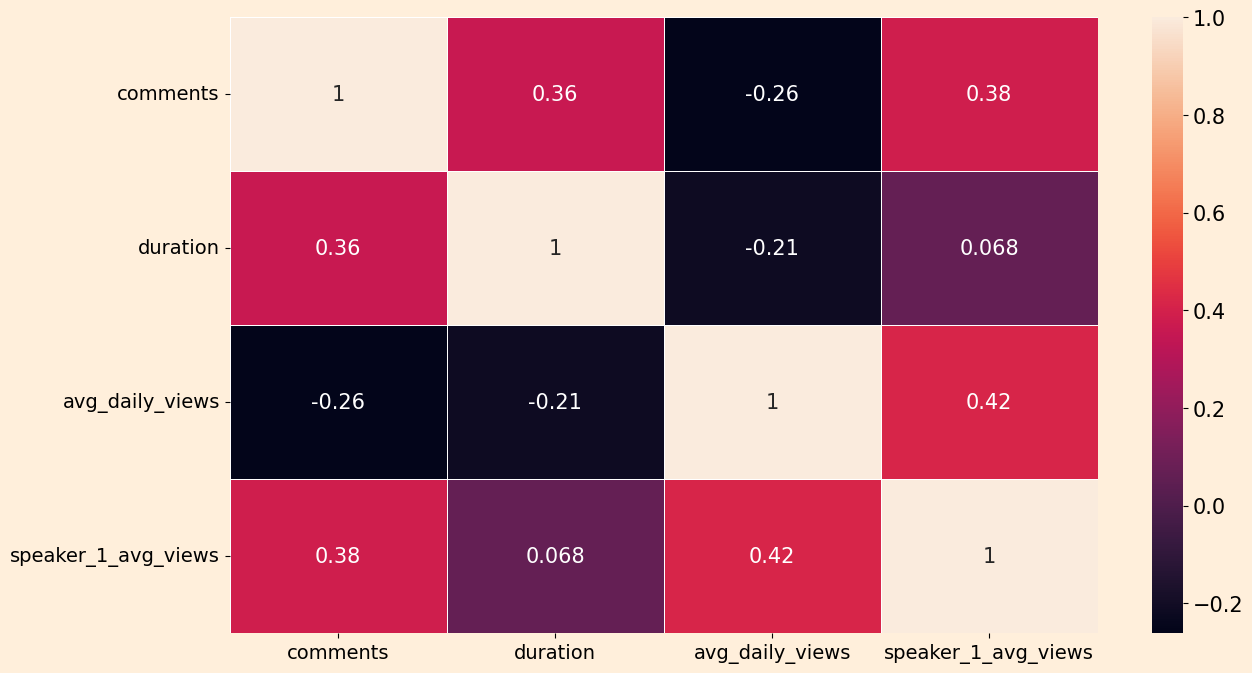

In [ ]:
# Correlation graph using heatmap
plt.figure(figsize = (14,8))
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
sns.heatmap(X.corr(), annot=True, linewidth=.5,)

In [ ]:
# Now Let's check the data set shape
X.shape

(4004, 4)

# MODEL IMPLEMENTATION:

Following algorithms have been used for predictions: -

1. Linear Regression
2. Lasso Regression
3. Ridge Regression
4. Elastic net regularization
5. Random Forest Regression
6. GradientBoostingRegressor
7. XGB Regression

In [ ]:
#train_test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 23)

# Linear Regression

In [ ]:
# Fitting the model.

reg = LinearRegression().fit(X_train, y_train)

# Predicting the values for train and test data.
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
LR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , LR_Train_MAE)
LR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , LR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
LR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , LR_Train_MSE)
LR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , LR_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
LR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , LR_Train_RMSE)
LR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , LR_Test_RMSE)

# of Training and Testing Data.
LR_Train_R2 = r2_score((y_train), (y_train_pred))
print("Train R2 :" , LR_Train_R2)
LR_Test_R2 = r2_score((y_test), (y_test_pred))
print("Test R2 :" , LR_Test_R2)

# Adjusted R2 of Training and Testing Data.
LR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", LR_Adjusted_R2)

Train Data MAE : 266216.9702101373
Test Data MAE : 276331.06558737357
Train Data MSE : 206154147714.1746
Test Data MSE : 228289995577.3945
Train Data RMSE: 454042.01095732825
Test Data RMSE: 477797.0234078426
Train R2 : 0.8307459318289225
Test R2 : 0.810947408157064
Adjusted R2 :  0.8099973951327277


# LASSO REGULARIZATION:

In [ ]:
# Setting the Tuning parameters
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,1000]}
# fitting x train and y train using Lasso
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 1000]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -207595463738.2255


In [ ]:
#Fitting the model.

lasso  = Lasso(alpha=1e-13 , max_iter= 3000)
lasso.fit(X_train, y_train)

# Predicting the values for train and test data.
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
LA_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , LA_Train_MAE)
LA_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , LA_Test_MAE)

# Mean Squared Error of Training and Testing Data.
LA_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , LA_Train_MSE)
LA_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , LA_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
LA_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , LA_Train_RMSE)
LA_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , LA_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
LA_Train_R2 = r2_score((y_train), (y_train_pred))
print("Train R2 :" , LA_Train_R2)
LA_Test_R2 = r2_score((y_test), (y_test_pred))
print("Test R2 :" , LA_Test_R2)

# Adjusted R2 of Training and Testing Data.
LA_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", LA_Adjusted_R2)

Train Data MAE : 266216.9702101373
Test Data MAE : 276331.06558737357
Train Data MSE : 206154147714.1746
Test Data MSE : 228289995577.3945
Train Data RMSE: 454042.01095732825
Test Data RMSE: 477797.0234078426
Train R2 : 0.8307459318289225
Test R2 : 0.810947408157064
Adjusted R2 :  0.8099973951327277


All of the Evaluation metrics for Lasso regularization have now been calculated. Let us now proceed to the Ridge regularization.

# RIDGE REGULARIZATION:

In [ ]:
# Setting the Tuning parameters
RI = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,6000,7000,8000]}
# fitting x train and y train using ridge
R_R = GridSearchCV(RI, parameters, cv=5)
R_R.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 6000, 7000, 8000]})

In [ ]:
# Best parameter in Ridge regression
print(R_R.best_params_)

{'alpha': 8000}


In [ ]:
# Predicting the values for train and test data.
y_train_pred = R_R.predict(X_train)
y_test_pred = R_R.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
RR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , RR_Train_MAE)
RR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , RR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
RR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , RR_Train_MSE)
RR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , RR_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
RR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , RR_Train_RMSE)
RR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , RR_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
RR_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , RR_Train_R2)
RR_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , RR_Test_R2)

# Adjusted R2 of Training and Testing Data.
RR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", RR_Adjusted_R2)

Train Data MAE : 266203.22138659697
Test Data MAE : 276317.4222475341
Train Data MSE : 206154149620.5512
Test Data MSE : 228290880840.76865
Train Data RMSE: 454042.0130566677
Test Data RMSE: 477797.94980804244
R2 : 0.8307459302637733
R2 : 0.8109466750485679
Adjusted R2 :  0.8099966583402692


All of the Evaluation metrics for Ridge Regularization have now been calculated. Let us now proceed to the Elastic Net Regularization.

# ELASTIC NET REGULARIZATION:

In [ ]:
# Setting the Tuning parameters
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
# fitting x train and y train using Elastic regressor
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20, 'l1_ratio': 0.3}

Using  {'alpha': 20, 'l1_ratio': 0.3}  the negative mean squared error is:  -207594833475.11044


In [ ]:
# Predicting the values for train and test data.
y_train_pred = elastic_regressor.predict(X_train)
y_test_pred = elastic_regressor.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
ER_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , ER_Train_MAE)
ER_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , ER_Test_MAE)

# Mean Squared Error of Training and Testing Data.
ER_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , ER_Train_MSE)
ER_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , ER_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
ER_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , ER_Train_RMSE)
ER_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , ER_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
ER_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , ER_Train_R2)
ER_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , ER_Test_R2)

# Adjusted R2 of Training and Testing Data.
ER_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", ER_Adjusted_R2)


Train Data MAE : 266140.0132201549
Test Data MAE : 276254.6834326172
Train Data MSE : 206154207460.87653
Test Data MSE : 228295001348.81458
Train Data RMSE: 454042.0767515677
Test Data RMSE: 477802.26176611445
R2 : 0.8307458827764418
R2 : 0.8109432627539388
Adjusted R2 :  0.809993228898431


All of the Evaluation metrics for Elastic Net regularization have now been calculated. Let us now proceed to the Random forest Regression.

# RANDOM FOREST REGRESSOR:

In [ ]:
# setting Random Forest regressor
RFR = RandomForestRegressor(n_estimators = 10, random_state = 57)

In [ ]:
# # fitting x train and y train
RFR.fit(X_train, y_train)
y_train_pred = RFR.predict(X_train)
y_test_pred = RFR.predict(X_test)


# Mean Absolute Error of Training and Testing Data.
RFR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , RFR_Train_MAE)
RFR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , RFR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
RFR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , RFR_Train_MSE)
RFR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , RFR_Test_MSE)

# Root Mean Squared error of test data.
RFR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , RFR_Train_RMSE)
RFR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE :" , RFR_Test_RMSE)

# Coefficient of determination of test data.
RFR_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , RFR_Train_R2)
RFR_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , RFR_Test_R2)

# Adjusted R2 of test data.
RFR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", RFR_Adjusted_R2)

Train Data MAE : 66334.52588198564
Test Data MAE : 184371.4633583021
Train Data MSE : 21868853969.379677
Test Data MSE : 149798081246.24316
Train Data RMSE: 147881.21574216138
Test Data RMSE : 387037.57084583293
R2 : 0.9820455104027856
R2 : 0.8759485038270104
Adjusted R2 :  0.8753251294743823


**Hyperparameter tuning in Random forest Regressor**

In [ ]:
RFR_H = RandomForestRegressor(criterion='squared_error')
grid_values = {'n_estimators':[50,80,100,120], 'min_samples_split':[2,4,8,16],'max_samples':[0.2,0.4,0.6,0.8],'max_features':[0.2,0.4,0.6,0.8,1],'min_samples_leaf':[100,200,300,400]}
RFR_H_grid = GridSearchCV(RFR_H, param_grid = grid_values, cv=5, n_jobs=-1)

In [ ]:
# Fit the object to train dataset
RFR_H_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': [0.2, 0.4, 0.6, 0.8, 1],
                         'max_samples': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [100, 200, 300, 400],
                         'min_samples_split': [2, 4, 8, 16],
                         'n_estimators': [50, 80, 100, 120]})

In [ ]:
RFR_H_grid_optimal_model = RFR_H_grid.best_estimator_
y_train_pred =  RFR_H_grid_optimal_model.predict(X_train)
y_test_pred  = RFR_H_grid_optimal_model.predict(X_test)

In [ ]:
# Mean Absolute Error of Training and Testing Data.
RFR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , RFR_Train_MAE)
RFR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , RFR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
RFR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , RFR_Train_MSE)
RFR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , RFR_Test_MSE)

# Root Mean Squared error of test data.
RFR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , RFR_Train_RMSE)
RFR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE :" , RFR_Test_RMSE)

# Coefficient of determination of test data.
RFR_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , RFR_Train_R2)
RFR_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , RFR_Test_R2)

# Adjusted R2 of test data.
RFR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", RFR_Adjusted_R2)

Train Data MAE : 250455.3831442731
Test Data MAE : 272600.240596779
Train Data MSE : 173921584837.90067
Test Data MSE : 203856406417.21417
Train Data RMSE: 417039.06871886796
Test Data RMSE : 451504.60287489224
R2 : 0.8572091024945607
R2 : 0.8311814676789214
Adjusted R2 :  0.8303331333456496


# GRADIENT BOOST REGRESSOR:

In [ ]:
# Create a Dictionary for estimators , Learing rate and max depth
grid = dict()
grid['n_estimators'] = [1, 3, 5, 10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0, 100]
grid['max_depth'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Fitting the model
grid_search_gb = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid=grid, n_jobs=-1, cv=5)
grid_result = grid_search_gb.fit(X_train , y_train)
print(grid_result.best_params_)

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}


In [ ]:
# Predicting the values for train and test data.
y_train_pred = grid_result.predict(X_train)
y_test_pred = grid_result.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
GB_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , GB_Train_MAE)
GB_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , GB_Test_MAE)

# Mean Squared Error of Training and Testing Data.
GB_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , GB_Train_MSE)
GB_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , GB_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
GB_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , GB_Train_RMSE)
GB_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , GB_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
GB_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , GB_Train_R2)
GB_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , GB_Test_R2)

# Adjusted R2 of Training and Testing Data.
GB_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", GB_Adjusted_R2)

Train Data MAE : 122784.32648083346
Test Data MAE : 175639.2504445892
Train Data MSE : 57853670454.52311
Test Data MSE : 118516239781.22874
Train Data RMSE: 240527.89953459267
Test Data RMSE: 344261.87674679974
R2 : 0.9525017119877058
R2 : 0.9018537704665898
Adjusted R2 :  0.901360573333256


# XG BOOST REGRESSOR:

In [ ]:
# Setting the learing rate , n estimators and max depth
xgb = XGBRegressor(learning_rate=0.1)
grid_values = {'n_estimators':[10, 30, 50, 80, 100], 'max_depth':[1, 3, 5, 7, 9]}
xgb_random = RandomizedSearchCV(xgb, param_distributions = grid_values, cv=3)

# Fit the object to train dataset
xgb_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'max_depth': [1, 3, 5, 7, 9],
                                        'n_estimators': [10, 30, 50, 80, 100]})

In [ ]:
# finding the optimal model w.r.t. best_estimator_
xgb_optimal_model = xgb_random.best_estimator_
xgb_optimal_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predicting the values for train and test data.

y_train_pred =  xgb_optimal_model.predict(X_train)
y_test_pred  = xgb_optimal_model.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
XG_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , XG_Train_MAE)
XG_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , XG_Test_MAE)

# Mean Squared Error of Training and Testing Data.
XG_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , XG_Train_MSE)
XG_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , XG_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
XG_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , XG_Train_RMSE)
XG_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , XG_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
XG_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , XG_Train_R2)
XG_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , XG_Test_R2)

# Adjusted R2 of Training and Testing Data.
XG_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", XG_Adjusted_R2)


Train Data MAE : 68834.18393614142
Test Data MAE : 176032.65205236617
Train Data MSE : 19566530236.905426
Test Data MSE : 130320943874.25075
Train Data RMSE: 139880.4140575278
Test Data RMSE: 360999.92226349685
R2 : 0.9839357350831466
R2 : 0.8920780030306132
Adjusted R2 :  0.8915356814378023


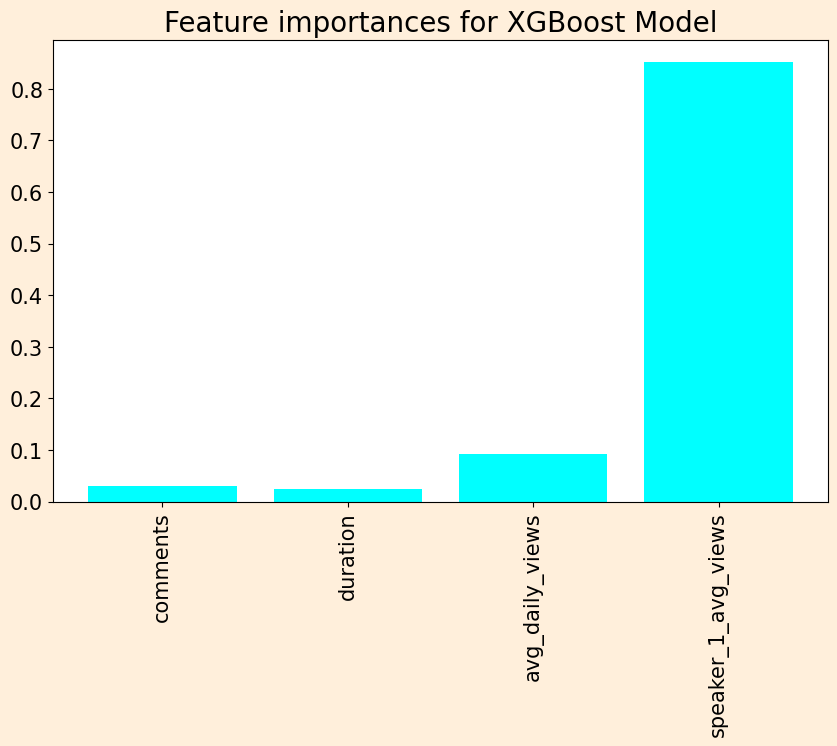

In [ ]:
# getting features according to their importance in prediction
xgb_features = X_train.columns
xgb_importances = xgb_random.best_estimator_.feature_importances_
xgb_indices = np.argsort(xgb_importances)

plt.figure(figsize=(10,6))
plt.bar(x=xgb_features, height=xgb_importances, color='aqua')
plt.title('Feature importances for XGBoost Model', size=20)
plt.xticks(rotation='vertical')
plt.show()

All of the Evaluation metrics for XG Boost Regressor have now been calculated.

Let us now combine all of the results to find the best model.

In [ ]:
# Creating a List of Dictionaries of Results of Train and Test data
ml_models = [{'Model Name': 'Linear Regression',
                 'Train MAE': LR_Train_MAE, 'Test MAE': LR_Test_MAE,
                 'Train MSE': LR_Train_MSE, 'Test MSE ': LR_Test_MSE,
                 'Train RMSE': LR_Train_RMSE, 'Test RMSE': LR_Test_RMSE,
                 'Train R2': LR_Train_R2, 'Test R2': LR_Test_R2,
                 'Adjusted R2': LR_Adjusted_R2},
            {'Model Name': 'Lasso Regularization',
                 'Train MAE': LA_Train_MAE, 'Test MAE': LA_Test_MAE,
                 'Train MSE': LA_Train_MSE, 'Test MSE ': LA_Test_MSE,
                 'Train RMSE': LA_Train_RMSE, 'Test RMSE': LA_Test_RMSE,
                 'Train R2': LA_Train_R2, 'Test R2': LA_Test_R2,
                 'Adjusted R2': LA_Adjusted_R2},
            {'Model Name': 'Ridge Regularization',
                 'Train MAE': RR_Train_MAE, 'Test MAE': RR_Test_MAE,
                 'Train MSE': RR_Train_MSE, 'Test MSE ': RR_Test_MSE,
                 'Train RMSE': RR_Train_RMSE, 'Test RMSE': RR_Test_RMSE,
                 'Train R2': RR_Train_R2, 'Test R2': RR_Test_R2,
                 'Adjusted R2': RR_Adjusted_R2},
            {'Model Name': 'Elastic Net Regularization',
                 'Train MAE': ER_Train_MAE, 'Test MAE': ER_Test_MAE,
                 'Train MSE': ER_Train_MSE, 'Test MSE ': ER_Test_MSE,
                 'Train RMSE': ER_Train_RMSE, 'Test RMSE': ER_Test_RMSE,
                 'Train R2': ER_Train_R2, 'Test R2': ER_Test_R2,
                 'Adjusted R2': ER_Adjusted_R2},
            {'Model Name': 'Random Forest Regression',
                 'Train MAE': RFR_Train_MAE, 'Test MAE': RFR_Test_MAE,
                 'Train MSE': RFR_Train_MSE, 'Test MSE ': RFR_Test_MSE,
                 'Train RMSE': RFR_Train_RMSE, 'Test RMSE': RFR_Test_RMSE,
                 'Train R2': RFR_Train_R2, 'Test R2': RFR_Test_R2,
                 'Adjusted R2': RFR_Adjusted_R2},
            {'Model Name': 'Gradient Boost Regression',
                 'Train MAE': GB_Train_MAE, 'Test MAE': GB_Test_MAE,
                 'Train MSE': GB_Train_MSE, 'Test MSE ': GB_Test_MSE,
                 'Train RMSE': GB_Train_RMSE, 'Test RMSE': GB_Test_RMSE,
                 'Train R2': GB_Train_R2, 'Test R2': GB_Test_R2,
                 'Adjusted R2': GB_Adjusted_R2},
            {'Model Name': 'XG Boost Regression',
                 'Train MAE': XG_Train_MAE, 'Test MAE': XG_Test_MAE,
                 'Train MSE': XG_Train_MSE, 'Test MSE ': XG_Test_MSE,
                 'Train RMSE': XG_Train_RMSE, 'Test RMSE': XG_Test_RMSE,
                 'Train R2': XG_Train_R2, 'Test R2': XG_Test_R2,
                 'Adjusted R2': XG_Adjusted_R2}]

In [ ]:
# Create a Data frame
conclusion_df = pd.DataFrame(ml_models)

In [ ]:
# Print the Data Frame
conclusion_df

,Model Name,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2,Adjusted R2
0,Linear Regression,266216.970210,276331.065587,2.061541e+11,2.282900e+11,454042.010957,477797.023408,0.830746,0.810947,0.809997
1,Lasso Regularization,266216.970210,276331.065587,2.061541e+11,2.282900e+11,454042.010957,477797.023408,0.830746,0.810947,0.809997
2,Ridge Regularization,266203.221387,276317.422248,2.061541e+11,2.282909e+11,454042.013057,477797.949808,0.830746,0.810947,0.809997
3,Elastic Net Regularization,266140.013220,276254.683433,2.061542e+11,2.282950e+11,454042.076752,477802.261766,0.830746,0.810943,0.809993
4,Random Forest Regression,250455.383144,272600.240597,1.739216e+11,2.038564e+11,417039.068719,451504.602875,0.857209,0.831181,0.830333
5,Gradient Boost Regression,122784.326481,175639.250445,5.785367e+10,1.185162e+11,240527.899535,344261.876747,0.952502,0.901854,0.901361
6,XG Boost Regression,68834.183936,176032.652052,1.956653e+10,1.303209e+11,139880.414058,360999.922263,0.983936,0.892078,0.891536


# **Conclusion**

**EDA conclusion :**

 *  Alex Gendler is the most popular and has the most views.

 *  With over 65 million views, Sir Ken Robinson's talk "Do Schools Kill Creativity?" is the most popular TED Talk of all time.
 * The most popular TED talk event is TED-Ed, followed by TED2015 and TED2014.
 * The majority of the speakers are writers, journalists, or business owners.
 * The majority of TED talks are released during the week. The most views are on Friday and Tuesday, followed by Wednesday.


**Model Conclusion :**

* Since MSE and RMSE penalize outliers very much, we will use MAE as Evaluation metric.

*   For Train and Test MAE, Random Forest Regression and Gradient Boost  produce relatively good results. XG Boost Regression, on the other hand, produced unsatisfactory results since there is a significant difference between train and test MAE.

*   Even though Random forest give us good train MSE results, the test errors are pretty high. Similarly, XG Boost Regression and Gradient Boost regression shows overfitting issue

*  For this Data Set, RMSE is not recommended. As we can see, there is a problem of underfitting.

*  For this Data Set, R2 produced the best results for each Regression Method. There is no overfitting, as shown by the Adjusted R2 result.

* According to previous findings, Random Forest Regression produces the best results for each Evaluation Matric.  

* Most important feature is found to speaker_1_avg_view, that means, Views on a TedTalk majorly depends on the speaker.

* More Popular Speaker gets more views.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***